# 1. Import Modules

In [1]:
# imports
# data transformation
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm

# 2. Load Data And Preprocessing

In [ ]:
# load data
shopper_df = pd.read_csv('dataset/online_shoppers_intention.csv')

In [ ]:
# display a sample
shopper_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# columns in the dataset
shopper_df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
# data type of columns
shopper_df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [6]:
# correcting the data type of columns
columns_to_convert = ['OperatingSystems','Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Month']
shopper_df['Revenue'] = shopper_df['Revenue'].astype(int)
shopper_df[columns_to_convert] = shopper_df[columns_to_convert].astype('object')

In [ ]:
# check column data types after collection
shopper_df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
VisitorType                 object
Weekend                     object
Revenue                      int32
dtype: object

In [10]:
# check for nulls
shopper_df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [12]:
# check for duplicates
shopper_df.duplicated().sum()

125

In [13]:
# remove duplicates
shopper_df.drop_duplicates(inplace=True)

In [14]:
# check for duplicates again
shopper_df.duplicated().sum()

0

# Data Exploration

In [15]:
# check distribution of values for Revenue column
# value 1: earned revenue
# value 0: did not earn revenue
shopper_df['Revenue'].value_counts()

0    10297
1     1908
Name: Revenue, dtype: int64

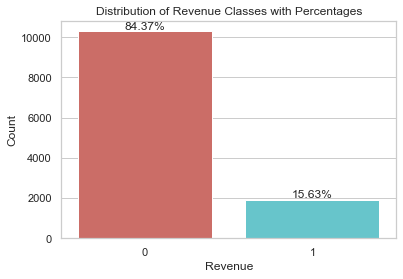

In [22]:
# create the count plot
ax = sns.countplot(x='Revenue', data=shopper_df, palette='hls')

# calculate the percentages
total = len(shopper_df)
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total:.2f}%"  # calculate percentage
    x = p.get_x() + p.get_width() / 2  # x-coordinate for text
    y = p.get_height()  # y-coordinate for text
    ax.annotate(percentage, (x, y), ha='center', va='bottom')  # annotate the bars

# show the plot
plt.title('Distribution of Revenue Classes with Percentages')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

In [11]:
# mean values of features for revenue classes
shopper_df[['Revenue', 'Administrative', 'Administrative_Duration',
           'Informational', 'Informational_Duration', 'ProductRelated',
           'ProductRelated_Duration', 'BounceRates', 'ExitRates',
           'PageValues', 'SpecialDay']].groupby('Revenue').mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Revenue,,,,,,,,,,
0,2.117732,73.740111,0.451833,30.236237,28.714642,1069.987809,0.025317,0.047378,1.975998,0.068432
1,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166


In [12]:
# mean values of features for different visitor types
shopper_df[['VisitorType', 'Administrative', 'Administrative_Duration',
           'Informational', 'Informational_Duration', 'ProductRelated',
           'ProductRelated_Duration', 'BounceRates', 'ExitRates',
           'PageValues', 'SpecialDay']].groupby('VisitorType').mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
VisitorType,,,,,,,,,,
New_Visitor,2.551948,91.911315,0.333530,19.237472,18.054900,636.393354,0.005261,0.020681,10.772187,0.020189
Other,1.470588,62.695588,0.176471,11.685490,12.470588,570.404862,0.038551,0.063349,18.191812,0.000000
Returning_Visitor,2.283954,79.183639,0.533504,37.101992,34.082457,1289.421490,0.024778,0.046505,5.006176,0.068543


In [13]:
# mean values of features for weekend and non-weekend
shopper_df[['Weekend', 'Administrative', 'Administrative_Duration',
           'Informational', 'Informational_Duration', 'ProductRelated',
           'ProductRelated_Duration', 'BounceRates', 'ExitRates',
           'PageValues', 'SpecialDay']].groupby('Weekend').mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Weekend,,,,,,,,,,
False,2.266857,79.359739,0.478546,32.606637,31.337455,1187.044261,0.023433,0.044747,5.766571,0.063264
True,2.474547,85.631667,0.586123,40.627846,33.031381,1220.156240,0.018095,0.037549,6.294020,0.055370


# Visualizations

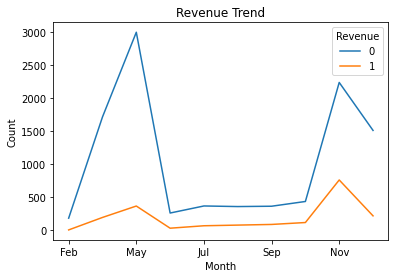

In [ ]:
month_category_count = shopper_df.groupby(['Month', 'Revenue']).size().unstack()

# Specify the desired order of index values
desired_order = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Reindex with the desired order
month_category_count = month_category_count.reindex(desired_order)

month_category_count.plot(kind='line', stacked=False)

# Adding title and labels
plt.title('Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Count')

# Display the plot
plt.show()

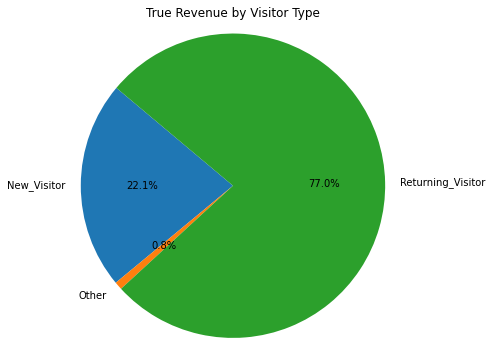

In [15]:
# Sample DataFrame
data = {'Fruit': ['Apple', 'Banana', 'Orange', 'Mango'],
        'Quantity': [30, 25, 20, 25]}  # Quantity in percentage

df = pd.DataFrame(data)

true_revenue = shopper_df[shopper_df['Revenue']==True].groupby(['VisitorType']).size()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(true_revenue.values, labels=true_revenue.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('True Revenue by Visitor Type')

plt.show()

# Create dummy variables

In [16]:
cat_vars=['OperatingSystems','Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Month']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(shopper_df[var], prefix=var)
    shopper_df1 = shopper_df.join(cat_list)
    shopper_df=shopper_df1

data_vars = shopper_df.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

C:\Users\Praveen Satya\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
C:\Users\Praveen Satya\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
C:\Users\Praveen Satya\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
C:\Users\Praveen Satya\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a f

In [17]:
shopper_df = shopper_df[to_keep]
shopper_df.columns.values

array(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Revenue', 'OperatingSystems_1',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3',
       'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8',
       'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_9', 'TrafficType_10', 'TrafficType_11',
       'TrafficType_12', 'TrafficType_13', 'TrafficType_

# Over-sampling using SMOTE

In [ ]:
X = shopper_df.loc[:, shopper_df.columns != 'Revenue']
y = shopper_df.loc[:, shopper_df.columns == 'Revenue']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X, os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['Revenue'])

print("Length of oversampled data is : ", len(os_data_X))
print("Number of no Revenue in oversampled data : ", len(os_data_y[os_data_y['Revenue']==0]))
print("Number of Revenue : ", len(os_data_y[os_data_y['Revenue']==1]))
print("Proportion of Revenue in oversampled data is : ", len(os_data_y[os_data_y['Revenue']==1]/len(os_data_X)))

Length of oversampled data is :  14690
Number of no Revenue in oversampled data :  7345
Number of Revenue :  7345
Proportion of Revenue in oversampled data is :  7345


# Recursive Feature Elimination

In [ ]:
data_final_vars = shopper_df.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

logreg = LogisticRegression()

rfe = RFE(logreg, step = 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Praveen Satya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Praveen Satya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

[False False False False False False False False False False  True  True
  True  True False False False False  True  True False  True  True False
 False False False False False False False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True False False
 False  True  True False  True False False False False False False  True
 False False False  True  True  True  True  True  True  True  True  True
 False  True  True]
[2 3 2 3 2 3 2 2 2 2 1 1 1 1 3 3 3 2 1 1 2 1 1 2 3 2 3 2 3 3 3 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 3 2 3 1 1 3 1 3 3 3 3 3 3 1 2 2 2 1 1 1 1 1 1 1 1 1 2 1
 1]


In [20]:
rfe.get_feature_names_out()

array(['OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'Browser_1', 'Browser_2', 'Browser_4',
       'Browser_5', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_6', 'TrafficType_10', 'TrafficType_11',
       'TrafficType_13', 'TrafficType_20', 'Weekend_False',
       'Weekend_True', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Oct', 'Month_Sep'],
      dtype=object)

In [21]:
cols=['OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'Browser_1', 'Browser_2', 'Browser_4',
       'Browser_5', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_6', 'TrafficType_10', 'TrafficType_11',
       'TrafficType_13', 'TrafficType_20', 'Weekend_False',
       'Weekend_True', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Oct', 'Month_Sep']
X=os_data_X[cols]
y=os_data_y['Revenue']

# Implementing the model

In [ ]:
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.459365
         Iterations 8
                          Results: Logit
Model:                Logit            Method:           MLE       
Dependent Variable:   Revenue          Pseudo R-squared: 0.337     
Date:                 2024-04-22 19:52 AIC:              13570.1378
No. Observations:     14690            BIC:              13851.1499
Df Model:             36               Log-Likelihood:   -6748.1   
Df Residuals:         14653            LL-Null:          -10182.   
Converged:            1.0000           LLR p-value:      0.0000    
No. Iterations:       8.0000           Scale:            1.0000    
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
OperatingSystems_1 -0.0475   0.1208  -0.3931 0.6942 -0.2842  0.1892
OperatingSystems_2  0.5400   0.0648   8.3

In [23]:
cols=['OperatingSystems_2', 'OperatingSystems_3', 'Browser_1', 'Browser_2', 
       'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_6', 'TrafficType_10', 'TrafficType_11',
       'TrafficType_13', 'TrafficType_20', 'Weekend_False',
       'Weekend_True', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Oct', 'Month_Sep']

X=os_data_X[cols]
y=os_data_y['Revenue']

logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.459410
         Iterations 8
                          Results: Logit
Model:                Logit            Method:           MLE       
Dependent Variable:   Revenue          Pseudo R-squared: 0.337     
Date:                 2024-04-22 19:52 AIC:              13563.4600
No. Observations:     14690            BIC:              13814.0925
Df Model:             32               Log-Likelihood:   -6748.7   
Df Residuals:         14657            LL-Null:          -10182.   
Converged:            1.0000           LLR p-value:      0.0000    
No. Iterations:       8.0000           Scale:            1.0000    
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
OperatingSystems_2  0.5387   0.0578   9.3209 0.0000  0.4254  0.6520
OperatingSystems_3 -0.6466   0.0937  -6.8

# Logistic Regression Model Fitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


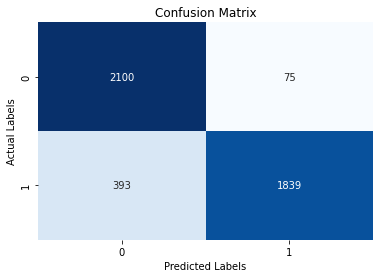

In [ ]:
# confusion matrix for Logistic Regression model
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# compute precision, recall, F-measure and support 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2175
           1       0.96      0.82      0.89      2232

    accuracy                           0.89      4407
   macro avg       0.90      0.89      0.89      4407
weighted avg       0.90      0.89      0.89      4407



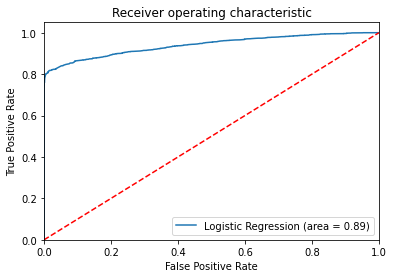

In [ ]:
# ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

C:\Users\Praveen Satya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Praveen Satya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


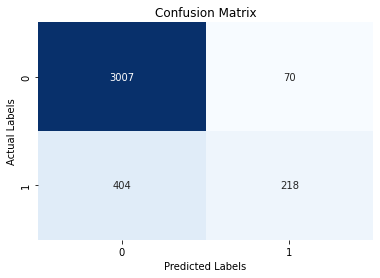

In [29]:
# result comparison - oversampled vs original data
X_org = shopper_df.loc[:, shopper_df.columns != 'Revenue']
y_org = shopper_df.loc[:, shopper_df.columns == 'Revenue']

X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X_org, y_org, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train_org, y_train_org)

y_pred_org = logreg.predict(X_test_org)

cm = confusion_matrix(y_test_org, y_pred_org)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

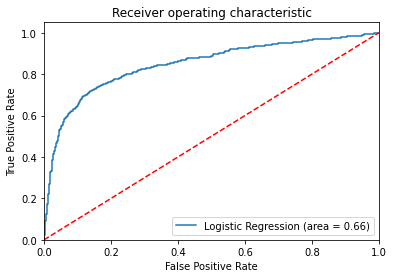

In [30]:
# ROC curve
logit_roc_auc = roc_auc_score(y_test_org, logreg.predict(X_test_org))
fpr, tpr, thresholds = roc_curve(y_test_org, logreg.predict_proba(X_test_org)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# SVM Model Fitting

In [ ]:
model = SVC(kernel='rbf', gamma='scale', C=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy of SVM model classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of SVM model classifier on test set: 0.89


# Confusion Matrix

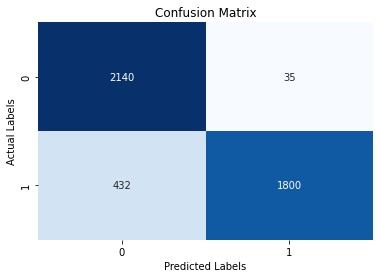

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# Compute precision, recall, F-measure and support

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2175
           1       0.98      0.81      0.89      2232

    accuracy                           0.89      4407
   macro avg       0.91      0.90      0.89      4407
weighted avg       0.91      0.89      0.89      4407



# Random Forests Model Fitting

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy of random forests model classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of random forests model classifier on test set: 0.88


# Confusion Matrix

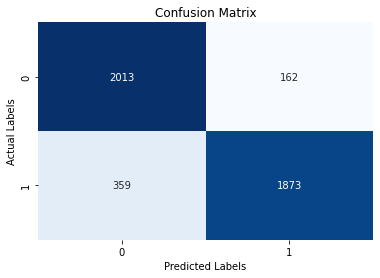

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# Compute precision, recall, F-measure and support

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2175
           1       0.92      0.84      0.88      2232

    accuracy                           0.88      4407
   macro avg       0.88      0.88      0.88      4407
weighted avg       0.88      0.88      0.88      4407



# ROC Curve

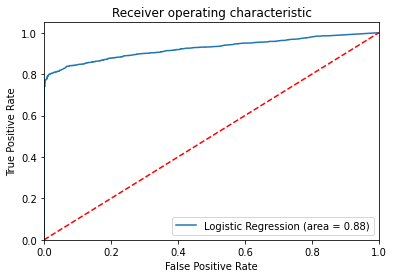

In [ ]:
rf_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()